In [1]:
from __future__ import print_function, division
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [2]:
img_highres = cv2.imread('/home/denis/GitHub/FashionML/data/img_highres/2-in-1_Space_Dye_Athletic_Tank/img_00000001.jpg')
img = cv2.imread('/home/denis/GitHub/FashionML/data/img/2-in-1_Space_Dye_Athletic_Tank/img_00000001.jpg')

In [3]:
box_cor = [(38, 66), (146, 268)]

In [4]:
img = cv2.rectangle(img, (38, 66), (146, 268), (0,255,0), 3)
img_highres = cv2.rectangle(img_highres, (38, 66), (146, 268), (0,255,0), 3)

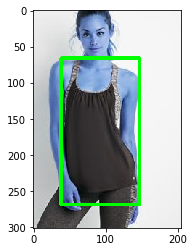

In [5]:
plt.imshow(img.astype(np.uint8))

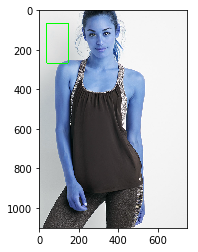

In [6]:
plt.imshow(img_highres)

In [7]:
import pandas as pd

In [8]:
list_landmarks = pd.read_csv('data/Anno/list_landmarks.csv')

In [9]:
def draw_boxes(img, boxes):
    img_w, img_h, _ = img.shape
    for box in boxes:
        x1, y1 = int((box[0] + box[2]/2)*img_w), int((box[1] + box[3]/2)*img_h)
        x2, y2 = int((box[0] - box[2]/2)*img_w), int((box[1] - box[3]/2)*img_h)
        cv2.rectangle(img, (x1, y1), (x2, y2), (0,255,0), 3)
    plt.imshow(img)

In [10]:
bbox_img = pd.read_csv('data/Anno/annotation_w-o_atr.csv')
img = cv2.imread('data/'+bbox_img.loc[0]['Path'])

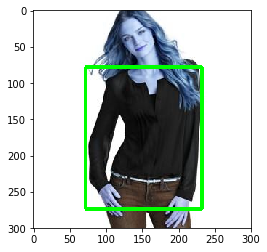

In [11]:
draw_boxes(img, [bbox_img.loc[0][['x','y', 'width', 'height']].values])

In [12]:
box = bbox_img.loc[0][['x1','y1', 'x2', 'y2']].values

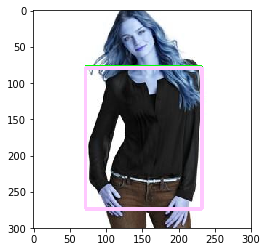

In [13]:
plt.imshow(cv2.rectangle(img, (box[0], box[1]), (box[2], box[3]), (255,200,255), 3))